# Comprehensive Analysis of Women Fragrances in the E-Commerce Market (ebay)

## Introduction
This project aims to analyze the sales data of women's fragrances on eBay for the year 2024. By examining this dataset, we seek to uncover trends and insights.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

In [2]:
# read in file
women_df = pd.read_csv('ebay_womens_perfume.csv')

In [3]:
women_df.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong"
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States"
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong"
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,10.0,More than 10 available,NaN,NaN,"Little Ferry, New Jersey, United States"


In [4]:
women_df.columns

Index(['brand', 'title', 'type', 'price', 'priceWithCurrency', 'available',
       'availableText', 'sold', 'lastUpdated', 'itemLocation'],
      dtype='object')

In [5]:
women_df.dtypes

brand                 object
title                 object
type                  object
price                float64
priceWithCurrency     object
available            float64
availableText         object
sold                 float64
lastUpdated           object
itemLocation          object
dtype: object

In [6]:
women_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               998 non-null    object 
 3   price              1000 non-null   float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          869 non-null    float64
 6   availableText      992 non-null    object 
 7   sold               984 non-null    float64
 8   lastUpdated        927 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB


In [7]:
women_df.describe()

,price,available,sold
count,1000.000000,869.000000,984.000000
mean,39.892980,21.426928,497.321138
std,29.072186,51.476703,1372.510561
min,1.990000,2.000000,1.000000
25%,20.700000,6.000000,15.000000
50%,32.990000,10.000000,52.000000
75%,49.990000,10.000000,263.750000
max,299.990000,557.000000,17854.000000


In [8]:
women_df.isnull().sum()

brand                  1
title                  0
type                   2
price                  0
priceWithCurrency      0
available            131
availableText          8
sold                  16
lastUpdated           73
itemLocation           0
dtype: int64

In [9]:
null_value = women_df['brand'].isnull()
women_df[null_value]

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
856,NaN,Bright Crystal de Versace Eau de Toilette 3.0 ...,NaN,29.99,US $29.99,NaN,2 disponibles / 3 vendidos,NaN,23 may 2024 02:42:14 EST,"Hamtramck, Michigan, Estados Unidos"


In [10]:
women_df[women_df['brand'] == 'Versace'].head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
7,Versace,Versace Bright Crystal Women EDT 6.7 oz 200 ml...,Eau de Toilette,52.79,US $52.79/ea,6.0,6 available / 258 sold,258.0,"May 21, 2024 06:41:13 PDT","Dexter, Michigan, United States"
8,Versace,Versace Bright Crystal by Versace for Women ED...,Eau de Toilette,29.99,US $29.99,NaN,Last One / 251 sold,251.0,"May 23, 2024 22:39:02 PDT","Jamaica, New York, United States"
39,Versace,Versace Dylan Turquoise by Gianni Versace for ...,Eau de Toilette,32.20,US $32.20/ea,60.0,60 available / 157 sold,157.0,"May 17, 2024 06:09:15 PDT","Dallas, Texas, United States"
61,Versace,Versace Bright Crystal Eau De Toilette Rollerb...,Eau de Toilette,15.49,US $15.49/ea,10.0,"More than 10 available / 1,089 sold",1089.0,"Apr 30, 2024 06:41:19 PDT","Keyport, New Jersey, United States"
93,Versace,Versace Bright Crystal Eau De Toilette Spray 6...,Eau de Toilette,41.50,US $41.50/ea,3.0,3 available / 255 sold,255.0,"May 24, 2024 01:02:37 PDT","San Jose, California, United States"


In [11]:
women_df['brand'].fillna('Versace', inplace=True)

In [12]:
null_value = women_df['type'].isnull()
women_df[null_value]

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
463,As Show,Carmina By Creed EDP 75ml 2.5 oz Spray For Wom...,NaN,128.88,US $128.88,10.0,10 available / 21 sold,21.0,"May 24, 2024 00:32:16 PDT","New Jersey, United States, Hong Kong"
856,Versace,Bright Crystal de Versace Eau de Toilette 3.0 ...,NaN,29.99,US $29.99,NaN,2 disponibles / 3 vendidos,NaN,23 may 2024 02:42:14 EST,"Hamtramck, Michigan, Estados Unidos"


In [13]:
women_df.loc[856,'type']= 'Eau de Toilette'

In [14]:
cond = women_df['title'].astype(str).str.startswith('Carmina By Creed EDP')
women_df[cond]

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
463,As Show,Carmina By Creed EDP 75ml 2.5 oz Spray For Wom...,NaN,128.88,US $128.88,10.0,10 available / 21 sold,21.0,"May 24, 2024 00:32:16 PDT","New Jersey, United States, Hong Kong"


In [15]:
women_df[women_df['brand'] == 'As Show']

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong"
124,As Show,J'adore 3.4 oz/100 ml Eau De Parfum EDP Women ...,Eau de Parfum,49.99,US $49.99,8.0,8 available / 22 sold,22.0,"May 23, 2024 17:51:19 PDT","USA, New Jersey, Hong Kong"
134,As Show,Flora Gorgeous Magnolia By-Gucci Eau De Parfum...,Eau de Parfum,54.99,US $54.99,NaN,Last One / 9 sold,9.0,"May 23, 2024 18:59:45 PDT","Ithaca, New York, United States"
142,As Show,3.3 oz 100 ml Flora Gorgeous Gardena Eau De Pa...,Eau de Parfum,49.99,US $49.99,4.0,4 available / 46 sold,46.0,"May 24, 2024 02:32:48 PDT","HongKong, Hong Kong"
208,As Show,Black Orchid By Tom Ford3.4 oz / 100 ml EDP fo...,Eau de Parfum,59.99,US $59.99/ea,5.0,5 available / 6 sold,6.0,"May 24, 2024 00:33:12 PDT","USA,California, Hong Kong"
393,As Show,Addict by Christian EDP Fragrances for Women 3...,EDP,59.99,US $59.99,10.0,More than 10 available / 20 sold,20.0,"May 24, 2024 00:31:53 PDT","New York, United States, Hong Kong"
463,As Show,Carmina By Creed EDP 75ml 2.5 oz Spray For Wom...,NaN,128.88,US $128.88,10.0,10 available / 21 sold,21.0,"May 24, 2024 00:32:16 PDT","New Jersey, United States, Hong Kong"
475,As Show,J'adore 3.4 oz/100 ml Eau De Parfum EDP Women ...,Eau de Parfum,78.99,US $78.99/ea,10.0,10 available / 7 sold,7.0,"May 22, 2024 05:41:23 PDT","Warren, Michigan, United States"
517,As Show,J'adore Eau De Parfum 3.4 oz EDP Spray Gift F...,Eau de Parfum,71.41,US $71.41/ea,5.0,5 available / 27 sold,27.0,"May 20, 2024 07:43:07 PDT","California,United States, Hong Kong"
854,As Show,L'Imperatrice 3 by D&G 3.3 oz 100ml Eau de Toi...,Eau de Toilette,32.99,US $32.99/ea,4.0,4 available / 14 sold,14.0,"May 24, 2024 10:01:28 PDT","HongKong, Hong Kong"


In [16]:
women_df['type'].fillna('Eau de Parfum', inplace=True)

In [17]:
women_df[['brand', 'type']].isnull().sum()

brand    0
type     0
dtype: int64

In [18]:
split_val_unique = women_df['availableText'].astype(str).str.split('/').str[0].unique()
split_val_unique

array(['2 available ', '5 available ', 'More than 10 available ',
       'More than 10 available', '8 available ', 'Out of Stock ',
       '6 available ', 'Last One ', '300 available ', '4 available ',
       'Limited quantity available ', '7 available ', '10 available ',
       '9 available ', '60 available ', '3 available ', '68 available ',
       '50 available ', '37 available ', '106 available ',
       '110 available ', '149 available ', '183 available ',
       '131 available ', '2 available', 'nan', '71 available ',
       '45 available ', '194 available ', '64 available ',
       '141 available ', '76 available ', '13 available ',
       '417 available ', '31 available ', '175 available ',
       '216 available ', '132 available ', '204 available ',
       '107 available ', '35 available ', '23 available ',
       '48 available ', '251 available ', '235 available ',
       '557 available ', '11 available ', '96 available ',
       '26 available ', '15 available ', '196 availab

In [19]:
def extract_number(text):
    # check special cases
    if 'Out of Stock' in text or 'nan' in text or 'Limited quantity available' in text:
        return  0
    elif 'Last One' in text:
        return 1
    # extact number from string
    numbers = []
    current_numb = ''
    for char in text:
        if char.isdigit():
            current_numb += char
        elif current_numb:
            numbers.append(int(current_numb))
            current_numb = ''
        # if there are 2 numbers in the string like this case
        #(More than 10 lots available (3 items per lot)) we have to multiply the 2 numbers
    if len(numbers) == 1:
        return numbers[0]
    else:
        result = 1
        for number in numbers:
                result *= number
        return result
extract_available = women_df['availableText'].astype(str).str.split('/').str[0]
women_df['correct_available'] = extract_available.apply(extract_number)
        

In [20]:
women_df['correct_available'].unique()

array([  2,   5,  10,   8,   0,   6,   1, 300,   4,   7,   9,  60,   3,
        68,  50,  37, 106, 110, 149, 183, 131,  71,  45, 194,  64, 141,
        76,  13, 417,  31, 175, 216, 132, 204, 107,  35,  23,  48, 251,
       235, 557,  11,  96,  26,  15, 196, 123,  89,  32, 408, 117, 189,
       174,  36,  72,  22,  17,  62,  21,  30,  51,  73, 114,  33, 127,
       234,  29,  70, 105,  44, 331,  16, 413,  18, 165,  93,  25, 112,
        38,  86, 145, 120,  67,  52,  19,  92, 103, 159, 252,  20,  47,
       200, 245,  28, 153,  34, 100, 500,  24,  82,  46,  12,  56, 214,
       111,  95,  41], dtype=int64)

In [21]:
women_df['available'].fillna(0)

0       2.0
1       5.0
2      10.0
3      10.0
4      10.0
       ... 
995    10.0
996    33.0
997     2.0
998     3.0
999     4.0
Name: available, Length: 1000, dtype: float64

In [22]:
women_df['correct_available'] = women_df['correct_available'].astype(float)

In [23]:
matches = np.sum(women_df['available'] == women_df['correct_available'])
total = len(women_df['available'])
match_percentage = (matches / total) * 100
match_percentage

86.9

In [24]:
np.sum(women_df['available'] != women_df['correct_available'])

131

In [25]:
women_df.shape

(1000, 11)

In [26]:
comparison = women_df['available'] != women_df['correct_available']
mismatched_rows = women_df[comparison]
unique_mismatches = mismatched_rows[['available', 'correct_available']].drop_duplicates()
unique_mismatches

,available,correct_available
6,NaN,0.0
8,NaN,1.0
358,NaN,30.0
856,NaN,2.0
990,NaN,32.0


In [27]:
# after a long analysis we can notice that the mismatched values due to NaN in available
#and since we extracted the correct_available so we drop the column available

In [28]:
women_df['correct_available'] = women_df['correct_available'].astype(int)

In [29]:
women_df.drop(columns=['available'], inplace=True)

In [30]:
split_sold_unique = women_df['availableText'].astype(str).str.split('/').str[1].unique()
split_sold_unique

array([' 393 sold', ' 40 sold', ' 35 sold', ' 9 sold', nan, ' 184 sold',
       ' 18 sold', ' 258 sold', ' 251 sold', ' 174 sold', ' 77 sold',
       ' 51 sold', ' 20 sold', ' 505 sold', ' 94 sold', ' 234 sold',
       ' 34 sold', ' 43 sold', ' 1,613 sold', ' 218 sold', ' 1 sold',
       ' 38 sold', ' 25 sold', ' 183 sold', ' 71 sold', ' 126 sold',
       ' 54 sold', ' 29 sold', ' 1,571 sold', ' 291 sold', ' 406 sold',
       ' 147 sold', ' 3 sold', ' 37 sold', ' 11 sold', ' 59 sold',
       ' 68 sold', ' 157 sold', ' 4 sold', ' 80 sold', ' 441 sold',
       ' 16 sold', ' 21 sold', ' 49 sold', ' 128 sold', ' 60 sold',
       ' 179 sold', ' 208 sold', ' 166 sold', ' 87 sold', ' 287 sold',
       ' 243 sold', ' 56 sold', ' 404 sold', ' 102 sold', ' 130 sold',
       ' 1,089 sold', ' 19 sold', ' 110 sold', ' 41 sold', ' 118 sold',
       ' 15 sold', ' 1,498 sold', ' 1,129 sold', ' 14 sold', ' 193 sold',
       ' 2 sold', ' 288 sold', ' 190 sold', ' 266 sold', ' 10 sold',
       ' 45 sold'

In [31]:
split_sold = women_df['availableText'].astype(str).str.split('/').str[1].str.strip()
sold_numbers = []
for text in split_sold:
    if pd.notna(text):
        sold_number = text.split(' ')[0]
        sold_numbers.append(int(sold_number.replace(',', '')))
    else:
        sold_numbers.append(0)
women_df['correct_sold'] = sold_numbers


In [32]:
women_df.head(10)

,brand,title,type,price,priceWithCurrency,availableText,sold,lastUpdated,itemLocation,correct_available,correct_sold
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States",2,393
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong",5,40
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States",10,35
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong",10,9
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,More than 10 available,NaN,NaN,"Little Ferry, New Jersey, United States",10,0
5,Viktor & Rolf,Flowerbomb by Viktor & Rolf 3.4 oz 100ML Eau D...,Eau de Parfum,51.99,US $51.99/ea,8 available / 184 sold,184.0,"May 23, 2024 10:44:09 PDT","Warren, Michigan, United States",8,184
6,AS SHOW,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,58.99,US $58.99,Out of Stock / 18 sold,18.0,"May 24, 2024 00:15:13 PDT","Astoria, New York, United States",0,18
7,Versace,Versace Bright Crystal Women EDT 6.7 oz 200 ml...,Eau de Toilette,52.79,US $52.79/ea,6 available / 258 sold,258.0,"May 21, 2024 06:41:13 PDT","Dexter, Michigan, United States",6,258
8,Versace,Versace Bright Crystal by Versace for Women ED...,Eau de Toilette,29.99,US $29.99,Last One / 251 sold,251.0,"May 23, 2024 22:39:02 PDT","Jamaica, New York, United States",1,251
9,Lattafa,Fakhar by Lattafa Eau de Parfum 3.4 oz / 100 m...,Eau de Parfum,22.75,US $22.75/ea,More than 10 available / 174 sold,174.0,"May 24, 2024 00:25:04 PDT","New York, New York, United States",10,174


In [33]:
women_df.drop(columns=['sold', 'availableText'], inplace=True)

In [34]:
women_df.isnull().sum()

brand                 0
title                 0
type                  0
price                 0
priceWithCurrency     0
lastUpdated          73
itemLocation          0
correct_available     0
correct_sold          0
dtype: int64

In [35]:
cond = women_df['lastUpdated'].isna()
women_df[cond]

,brand,title,type,price,priceWithCurrency,lastUpdated,itemLocation,correct_available,correct_sold
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,NaN,"Little Ferry, New Jersey, United States",10,0
21,~ CREPE ERASE ~,CREPE ERASE-BODY FIRM ADVANCED BODY REPAIR TRE...,~ BODY FIRM ADVANCED BODY REPAIR TREATMENT ~,29.99,US $29.99,NaN,"Melrose Park, Illinois, United States",10,1
36,Parfums de Marly,PDM PARFUMS DE MARLY DELINA EXCLUSIF 1.5ml .05...,Parfum,12.00,US $12.00,NaN,"Albany, New York, United States",10,59
70,Maison Margiela,Maison Margiela Replica Sailing Day Eau de Toi...,Eau de Toilette,48.88,US $48.88,NaN,"College Point, New York, United States",10,14
79,Dossier,Dossier Ambery Vanilla Eau de Parfum. Size: 50...,Eau de Parfum,19.00,US $19.00/ea,NaN,"Los Angeles, California, United States",10,10
...,...,...,...,...,...,...,...,...,...
946,Lattafa,Lattafa Yara Women's Floral Perfume 5mL Sample...,Perfume,9.99,US $9.99,NaN,"Sunnyside, New York, United States",7,13
974,Parfums de Marly,Parfums de Marly Delina 2.5 fl oz Women's EDP ...,Eau de Parfum,80.00,US $80.00,NaN,"Pittsburgh, Pennsylvania, United States",10,2
978,Tom Ford,Tom Ford Black Orchid Eau De Parfum Sample Siz...,Eau de Parfum,11.49,US $11.49,NaN,"Burlington, Iowa, United States",10,64
983,Burberry,Burberry Her ELIXIR DE PARFUM EDP Intense-Delu...,Eau de Parfum,13.00,US $13.00,NaN,"Chino, California, United States",0,0


In [36]:
women_df['lastUpdated'].fillna('', inplace=True)

In [37]:
women_df.isnull().sum()

brand                0
title                0
type                 0
price                0
priceWithCurrency    0
lastUpdated          0
itemLocation         0
correct_available    0
correct_sold         0
dtype: int64

In [38]:
women_df.duplicated().sum()

1

In [39]:
women_df.drop_duplicates(inplace=True)

In [40]:
women_df.duplicated().sum()

0

In [41]:
women_df['priceWithCurrency'].unique()

array(['US $43.99/ea', 'US $79.99', 'US $59.99', 'US $59.99/ea',
       'US $29.99/ea', 'US $51.99/ea', 'US $58.99', 'US $52.79/ea',
       'US $29.99', 'US $22.75/ea', 'US $39.99/ea', 'US $64.99/ea',
       'US $60.99/ea', 'US $43.49/ea', 'US $29.20/ea', 'US $13.00',
       'US $39.69/ea', 'US $11.00', 'US $27.00/ea', 'US $16.27/ea',
       'US $54.95', 'US $49.99/ea', 'US $84.99', 'US $53.99', 'US $99.99',
       'US $40.92/ea', 'US $22.90/ea', 'US $42.00/ea', 'US $44.88/ea',
       'US $66.99', 'US $129.99', 'US $22.99', 'US $12.00', 'US $32.95',
       'US $31.05/ea', 'US $32.20/ea', 'US $17.90/ea', 'US $29.75',
       'US $19.99/ea', 'US $42.88', 'US $100.99', 'US $26.05/ea',
       'US $54.99/ea', 'US $47.49/ea', 'US $43.99', 'US $32.00',
       'US $31.50/ea', 'US $42.99/ea', 'US $98.99', 'US $39.99',
       'US $27.99/ea', 'US $15.49/ea', 'US $23.25/ea', 'US $16.26/ea',
       'US $49.68/ea', 'US $27.90/ea', 'US $36.79/ea', 'US $48.88',
       'US $55.99/ea', 'US $42.98', 'US $

In [42]:
def extract_price(text):
    if pd.isna(text):
        return 0
    else:
        price_str = text.replace('US $', '').replace('/ea', '')
        return float(price_str)
women_df['price_in_$'] = women_df['priceWithCurrency'].apply(extract_price)
women_df['price_in_$']

0      43.99
1      79.99
2      59.99
3      59.99
4      29.99
       ...  
995    13.89
996    57.85
997    30.96
998    53.99
999    14.99
Name: price_in_$, Length: 999, dtype: float64

In [43]:
women_df.head()

,brand,title,type,price,priceWithCurrency,lastUpdated,itemLocation,correct_available,correct_sold,price_in_$
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States",2,393,43.99
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong",5,40,79.99
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States",10,35,59.99
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong",10,9,59.99
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,,"Little Ferry, New Jersey, United States",10,0,29.99


In [44]:
women_df.drop(columns=['priceWithCurrency'], inplace=True)

In [45]:
women_df.head()

,brand,title,type,price,lastUpdated,itemLocation,correct_available,correct_sold,price_in_$
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States",2,393,43.99
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong",5,40,79.99
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States",10,35,59.99
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong",10,9,59.99
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,,"Little Ferry, New Jersey, United States",10,0,29.99


In [46]:
women_df['type'].unique()

array(['Eau de Parfum', 'Eau de Toilette', 'Eau De Parfum', 'Spray',
       '~ BODY FIRM ADVANCED BODY REPAIR TREATMENT ~', 'Parfum',
       'Fragrance Mist', 'Deodorant Stick', 'Gift Sets', 'Eau de Perfume',
       'Eau de Cologne', '3 Pc', 'Eau de Parfum, Eau De Parfume',
       'Body Spray', 'Extrait de Parfum', 'Mist',
       'Eau de Toilette, Spray', 'Perfume', '/', 'Perfume, Eau de Parfum',
       'Fragrances', 'Eau De Cologne', 'Hair Perfume',
       'Eau de Parfum, Spray', 'Cream', 'Eau De Parfum 2 Pcs Set', 'EDT',
       "L'Eau de Parfum", 'Eau de Parfume', "L'eau de Parfum",
       'SKIN_MOISTURIZER', 'EDP and Parfum', 'Fine Fragrance Mist',
       'Lotion', 'Does not apply', 'Scented Oils', 'Shimmer', 'EDP',
       'Eau De Toilette', 'Perfume Fragrance Mist', 'Perfume Oil',
       'Parfum, Lotion, Gloss and Blush', 'Bath Oil', 'Elixir De Parfum',
       'Body Mist', 'ASST', 'BEAUTY', 'Extract Parfum', 'Does Not Apply',
       'Shimmering Body Oil', 'Body Powder', 'Eau De Par

In [47]:
women_df[women_df['type'].isin(['/', '1', 'Does not apply'])]

,brand,title,type,price,lastUpdated,itemLocation,correct_available,correct_sold,price_in_$
99,Unbranded,Yara by Lattafa Perfumes | Eau De Parfum-100ml...,/,15.89,"May 24, 2024 06:56:49 PDT","shanghai, China",10,434,15.89
377,Kate Spade New York,In Full Bloom Blush by Kate Spade for Women - ...,Does not apply,14.40,"May 22, 2024 21:21:54 PDT","Old Bethpage, New York, United States",5,73,14.40
997,Unbranded,"Sweet Tooth Eau de Parfum, Perfume for Women, ...",1,30.96,"May 17, 2024 23:16:41 PDT","New York, New York, United States",2,3,30.96


In [48]:
women_df.loc[women_df['type'].isin(['/', '1', 'Does not apply']), 'type'] = 'Eau de Parfum'

In [49]:
women_df.loc[women_df['type'].isin(['/', '1', 'Does not apply']), 'type']

Series([], Name: type, dtype: object)

In [50]:
cond = women_df['type'].str.startswith('~')
women_df.loc[cond, 'type']= women_df.loc[cond, 'type'].str.replace('~', '')

In [51]:
women_df['type'] = women_df['type'].str.strip()
women_df['type'].unique()

array(['Eau de Parfum', 'Eau de Toilette', 'Eau De Parfum', 'Spray',
       'BODY FIRM ADVANCED BODY REPAIR TREATMENT', 'Parfum',
       'Fragrance Mist', 'Deodorant Stick', 'Gift Sets', 'Eau de Perfume',
       'Eau de Cologne', '3 Pc', 'Eau de Parfum, Eau De Parfume',
       'Body Spray', 'Extrait de Parfum', 'Mist',
       'Eau de Toilette, Spray', 'Perfume', 'Perfume, Eau de Parfum',
       'Fragrances', 'Eau De Cologne', 'Hair Perfume',
       'Eau de Parfum, Spray', 'Cream', 'Eau De Parfum 2 Pcs Set', 'EDT',
       "L'Eau de Parfum", 'Eau de Parfume', "L'eau de Parfum",
       'SKIN_MOISTURIZER', 'EDP and Parfum', 'Fine Fragrance Mist',
       'Lotion', 'Scented Oils', 'Shimmer', 'EDP', 'Eau De Toilette',
       'Perfume Fragrance Mist', 'Perfume Oil',
       'Parfum, Lotion, Gloss and Blush', 'Bath Oil', 'Elixir De Parfum',
       'Body Mist', 'ASST', 'BEAUTY', 'Extract Parfum', 'Does Not Apply',
       'Shimmering Body Oil', 'Body Powder', 'Eau De Parfum Supreme',
       'colog

In [52]:
women_df['brand'].unique()

array(['Carolina Herrera', 'As Shown', 'PRADA', 'As Show', 'Khadlaj',
       'Viktor & Rolf', 'AS SHOW', 'Versace', 'Lattafa',
       'Yves Saint Laurent', 'Gucci', 'Coach', 'Guerlain', 'Philosophy',
       'Marc Jacobs', 'AS SHOWN', 'Dolce & Gabbana', 'QRC',
       '~ CREPE ERASE ~', 'Unbranded', 'YSL', 'Parfums de Marly',
       'Dolce&Gabbana', 'EX NIHILO', 'Juliette has a gun', 'Davidoff',
       'Giorgi^o Armani', 'Roja', 'Ariana Grande', 'Sol De Janeiro',
       'Kilian', 'Donna Karan', 'Narciso Rodriguez', 'Giorgio² Armani',
       'KENZO', 'Burberry', 'Thierry Mugler', 'Juicy Couture',
       'Maison Margiela', 'Jo Malone', 'Elizabeth Arden',
       'Urban Outfitters', 'Dossier', 'Maison Alhambra', 'ALT Fragrances',
       'Estée Lauder', "Victoria's Secret", 'Kim Kardashian', 'Gap',
       'Cacharel', 'Jessica McClintock', 'AS  SHOWN', 'Clinique',
       'Valentino', 'Giorgio Armani', 'Jimmy Choo', 'Calvin Klein',
       'Alfred Sung', 'Gloria Vanderbilt', 'Parfums', 'Ouai', '

In [53]:
cond = women_df['brand'].str.startswith('~')
women_df.loc[cond, 'brand'] = women_df.loc[cond, 'brand'].str.replace('~', '').str.strip()
women_df['brand'].unique()

array(['Carolina Herrera', 'As Shown', 'PRADA', 'As Show', 'Khadlaj',
       'Viktor & Rolf', 'AS SHOW', 'Versace', 'Lattafa',
       'Yves Saint Laurent', 'Gucci', 'Coach', 'Guerlain', 'Philosophy',
       'Marc Jacobs', 'AS SHOWN', 'Dolce & Gabbana', 'QRC', 'CREPE ERASE',
       'Unbranded', 'YSL', 'Parfums de Marly', 'Dolce&Gabbana',
       'EX NIHILO', 'Juliette has a gun', 'Davidoff', 'Giorgi^o Armani',
       'Roja', 'Ariana Grande', 'Sol De Janeiro', 'Kilian', 'Donna Karan',
       'Narciso Rodriguez', 'Giorgio² Armani', 'KENZO', 'Burberry',
       'Thierry Mugler', 'Juicy Couture', 'Maison Margiela', 'Jo Malone',
       'Elizabeth Arden', 'Urban Outfitters', 'Dossier',
       'Maison Alhambra', 'ALT Fragrances', 'Estée Lauder',
       "Victoria's Secret", 'Kim Kardashian', 'Gap', 'Cacharel',
       'Jessica McClintock', 'AS  SHOWN', 'Clinique', 'Valentino',
       'Giorgio Armani', 'Jimmy Choo', 'Calvin Klein', 'Alfred Sung',
       'Gloria Vanderbilt', 'Parfums', 'Ouai', 'Lanc

In [54]:
women_df['type'].unique()

array(['Eau de Parfum', 'Eau de Toilette', 'Eau De Parfum', 'Spray',
       'BODY FIRM ADVANCED BODY REPAIR TREATMENT', 'Parfum',
       'Fragrance Mist', 'Deodorant Stick', 'Gift Sets', 'Eau de Perfume',
       'Eau de Cologne', '3 Pc', 'Eau de Parfum, Eau De Parfume',
       'Body Spray', 'Extrait de Parfum', 'Mist',
       'Eau de Toilette, Spray', 'Perfume', 'Perfume, Eau de Parfum',
       'Fragrances', 'Eau De Cologne', 'Hair Perfume',
       'Eau de Parfum, Spray', 'Cream', 'Eau De Parfum 2 Pcs Set', 'EDT',
       "L'Eau de Parfum", 'Eau de Parfume', "L'eau de Parfum",
       'SKIN_MOISTURIZER', 'EDP and Parfum', 'Fine Fragrance Mist',
       'Lotion', 'Scented Oils', 'Shimmer', 'EDP', 'Eau De Toilette',
       'Perfume Fragrance Mist', 'Perfume Oil',
       'Parfum, Lotion, Gloss and Blush', 'Bath Oil', 'Elixir De Parfum',
       'Body Mist', 'ASST', 'BEAUTY', 'Extract Parfum', 'Does Not Apply',
       'Shimmering Body Oil', 'Body Powder', 'Eau De Parfum Supreme',
       'colog

In [55]:
cond = women_df['type'].isin(['Eau de Parfum', 'Parfum', 'Eau de Perfume',
                              'Eau De Parfume', 'Perfume', "L'Eau de Parfum",
                              'Eau De Parfum Supreme', 'Elixir De Parfum',
                              'Esprit de Parfum', 'Eau de Parfum/Perfume',
                              'Eau de Parfum, Spray', 'Perfume, Eau de Parfum',
                              'Eau De Parfume', 'Eau de Parfum, Eau De Parfume',
                             'Eau De Parfum', 'Eau de Parfume', 'Eau de Parfume', "L'eau de Parfum", "Extrait de Parfum"])
women_df.loc[cond, 'type'] = 'Eau de Parfum'

In [56]:
women_df['type'].unique()

array(['Eau de Parfum', 'Eau de Toilette', 'Spray',
       'BODY FIRM ADVANCED BODY REPAIR TREATMENT', 'Fragrance Mist',
       'Deodorant Stick', 'Gift Sets', 'Eau de Cologne', '3 Pc',
       'Body Spray', 'Mist', 'Eau de Toilette, Spray', 'Fragrances',
       'Eau De Cologne', 'Hair Perfume', 'Cream',
       'Eau De Parfum 2 Pcs Set', 'EDT', 'SKIN_MOISTURIZER',
       'EDP and Parfum', 'Fine Fragrance Mist', 'Lotion', 'Scented Oils',
       'Shimmer', 'EDP', 'Eau De Toilette', 'Perfume Fragrance Mist',
       'Perfume Oil', 'Parfum, Lotion, Gloss and Blush', 'Bath Oil',
       'Body Mist', 'ASST', 'BEAUTY', 'Extract Parfum', 'Does Not Apply',
       'Shimmering Body Oil', 'Body Powder', 'cologne',
       'Perfume Gift Sets', 'Toilette Spray',
       'Eau De Parfum Spray (Unisex Tester) 3.4 oz', 'Body Lotion',
       'deodorant', 'Discovery Set', 'SOLID PERFUME STICK', 'Cologne',
       'Eau De Toilette Spray 3.4 oz', 'Eau De Parfum 3 Pcs Set',
       'Sensuous Body Moisturizer', 'Col

In [57]:
cond = women_df['type'].str.contains('Cologne')
women_df.loc[cond, 'type'] = 'Eau de cologne'

In [58]:
women_df['type'].unique()

array(['Eau de Parfum', 'Eau de Toilette', 'Spray',
       'BODY FIRM ADVANCED BODY REPAIR TREATMENT', 'Fragrance Mist',
       'Deodorant Stick', 'Gift Sets', 'Eau de cologne', '3 Pc',
       'Body Spray', 'Mist', 'Eau de Toilette, Spray', 'Fragrances',
       'Hair Perfume', 'Cream', 'Eau De Parfum 2 Pcs Set', 'EDT',
       'SKIN_MOISTURIZER', 'EDP and Parfum', 'Fine Fragrance Mist',
       'Lotion', 'Scented Oils', 'Shimmer', 'EDP', 'Eau De Toilette',
       'Perfume Fragrance Mist', 'Perfume Oil',
       'Parfum, Lotion, Gloss and Blush', 'Bath Oil', 'Body Mist', 'ASST',
       'BEAUTY', 'Extract Parfum', 'Does Not Apply',
       'Shimmering Body Oil', 'Body Powder', 'cologne',
       'Perfume Gift Sets', 'Toilette Spray',
       'Eau De Parfum Spray (Unisex Tester) 3.4 oz', 'Body Lotion',
       'deodorant', 'Discovery Set', 'SOLID PERFUME STICK',
       'Eau De Toilette Spray 3.4 oz', 'Eau De Parfum 3 Pcs Set',
       'Sensuous Body Moisturizer', 'Pink Sugar', 'Oil Perfume',
    

In [59]:
cond = women_df['type'].str.contains('Toilette')
women_df.loc[cond, 'type'] = 'Eau de toilette'
women_df['type'].unique()

array(['Eau de Parfum', 'Eau de toilette', 'Spray',
       'BODY FIRM ADVANCED BODY REPAIR TREATMENT', 'Fragrance Mist',
       'Deodorant Stick', 'Gift Sets', 'Eau de cologne', '3 Pc',
       'Body Spray', 'Mist', 'Fragrances', 'Hair Perfume', 'Cream',
       'Eau De Parfum 2 Pcs Set', 'EDT', 'SKIN_MOISTURIZER',
       'EDP and Parfum', 'Fine Fragrance Mist', 'Lotion', 'Scented Oils',
       'Shimmer', 'EDP', 'Perfume Fragrance Mist', 'Perfume Oil',
       'Parfum, Lotion, Gloss and Blush', 'Bath Oil', 'Body Mist', 'ASST',
       'BEAUTY', 'Extract Parfum', 'Does Not Apply',
       'Shimmering Body Oil', 'Body Powder', 'cologne',
       'Perfume Gift Sets', 'Eau De Parfum Spray (Unisex Tester) 3.4 oz',
       'Body Lotion', 'deodorant', 'Discovery Set', 'SOLID PERFUME STICK',
       'Eau De Parfum 3 Pcs Set', 'Sensuous Body Moisturizer',
       'Pink Sugar', 'Oil Perfume', 'FRAGRANCE BODY MIST'], dtype=object)

In [60]:
cond = women_df['type'].str.contains('Mist|Spray')
women_df.loc[cond, 'type'] = 'body mist'
women_df['type'].unique()

array(['Eau de Parfum', 'Eau de toilette', 'body mist',
       'BODY FIRM ADVANCED BODY REPAIR TREATMENT', 'Deodorant Stick',
       'Gift Sets', 'Eau de cologne', '3 Pc', 'Fragrances',
       'Hair Perfume', 'Cream', 'Eau De Parfum 2 Pcs Set', 'EDT',
       'SKIN_MOISTURIZER', 'EDP and Parfum', 'Lotion', 'Scented Oils',
       'Shimmer', 'EDP', 'Perfume Oil', 'Parfum, Lotion, Gloss and Blush',
       'Bath Oil', 'ASST', 'BEAUTY', 'Extract Parfum', 'Does Not Apply',
       'Shimmering Body Oil', 'Body Powder', 'cologne',
       'Perfume Gift Sets', 'Body Lotion', 'deodorant', 'Discovery Set',
       'SOLID PERFUME STICK', 'Eau De Parfum 3 Pcs Set',
       'Sensuous Body Moisturizer', 'Pink Sugar', 'Oil Perfume',
       'FRAGRANCE BODY MIST'], dtype=object)

In [61]:
cond = women_df['type'] == 'Does Not Apply'
women_df[cond]

,brand,title,type,price,lastUpdated,itemLocation,correct_available,correct_sold,price_in_$
574,Cacharel,Noa by Cacharel for Women Eau de Toilette Spra...,Does Not Apply,20.0,"Apr 28, 2024 19:08:51 PDT","New York, New York, United States",10,79,20.0


In [62]:
women_df.loc[cond, 'type'] = 'Eau de toilette'

In [63]:
women_df['type'].unique()

array(['Eau de Parfum', 'Eau de toilette', 'body mist',
       'BODY FIRM ADVANCED BODY REPAIR TREATMENT', 'Deodorant Stick',
       'Gift Sets', 'Eau de cologne', '3 Pc', 'Fragrances',
       'Hair Perfume', 'Cream', 'Eau De Parfum 2 Pcs Set', 'EDT',
       'SKIN_MOISTURIZER', 'EDP and Parfum', 'Lotion', 'Scented Oils',
       'Shimmer', 'EDP', 'Perfume Oil', 'Parfum, Lotion, Gloss and Blush',
       'Bath Oil', 'ASST', 'BEAUTY', 'Extract Parfum',
       'Shimmering Body Oil', 'Body Powder', 'cologne',
       'Perfume Gift Sets', 'Body Lotion', 'deodorant', 'Discovery Set',
       'SOLID PERFUME STICK', 'Eau De Parfum 3 Pcs Set',
       'Sensuous Body Moisturizer', 'Pink Sugar', 'Oil Perfume',
       'FRAGRANCE BODY MIST'], dtype=object)

In [64]:
women_df['type'] = women_df['type'].replace('FRAGRANCE BODY MIST', 'body mist')
women_df['type'].unique()

array(['Eau de Parfum', 'Eau de toilette', 'body mist',
       'BODY FIRM ADVANCED BODY REPAIR TREATMENT', 'Deodorant Stick',
       'Gift Sets', 'Eau de cologne', '3 Pc', 'Fragrances',
       'Hair Perfume', 'Cream', 'Eau De Parfum 2 Pcs Set', 'EDT',
       'SKIN_MOISTURIZER', 'EDP and Parfum', 'Lotion', 'Scented Oils',
       'Shimmer', 'EDP', 'Perfume Oil', 'Parfum, Lotion, Gloss and Blush',
       'Bath Oil', 'ASST', 'BEAUTY', 'Extract Parfum',
       'Shimmering Body Oil', 'Body Powder', 'cologne',
       'Perfume Gift Sets', 'Body Lotion', 'deodorant', 'Discovery Set',
       'SOLID PERFUME STICK', 'Eau De Parfum 3 Pcs Set',
       'Sensuous Body Moisturizer', 'Pink Sugar', 'Oil Perfume'],
      dtype=object)

In [65]:
women_df.describe()

,price,correct_available,correct_sold,price_in_$
count,999.000000,999.000000,999.000000,999.000000
mean,39.884865,18.801802,489.855856,39.884865
std,29.085615,48.512655,1363.499696,29.085615
min,1.990000,0.000000,0.000000,1.990000
25%,20.690000,4.000000,14.000000,20.690000
50%,32.990000,9.000000,51.000000,32.990000
75%,49.990000,10.000000,257.000000,49.990000
max,299.990000,557.000000,17854.000000,299.990000


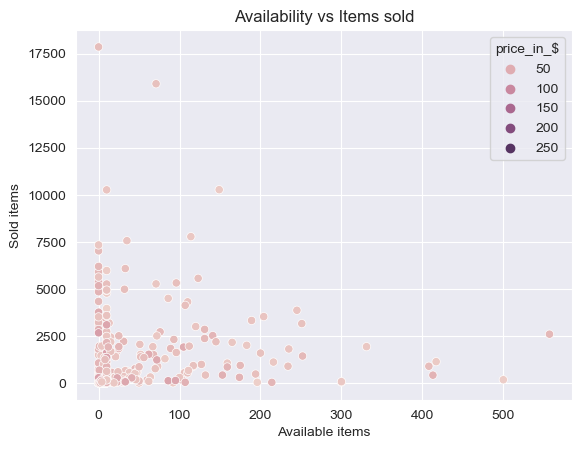

In [66]:
# examine the relationship between availability and items sold
sns.scatterplot(x='correct_available', y='correct_sold', data=women_df, hue='price_in_$')
plt.title('Availability vs Items sold')
plt.xlabel('Available items')
plt.ylabel('Sold items')
plt.show()

#### We can observe from this plot that products with lower prices tend to have higher sales.

C:\Users\rania\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


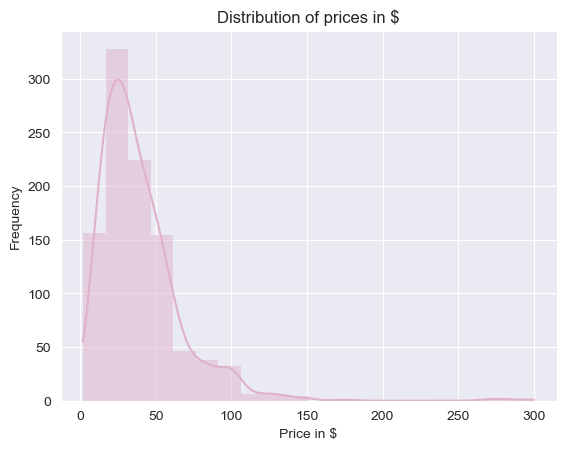

In [122]:
# analyze distribution of prices
sns.histplot(women_df['price_in_$'], kde=True, bins=20, color='#e0b1cb', edgecolor='none')
plt.title('Distribution of prices in $')
plt.xlabel('Price in $')
plt.ylabel('Frequency')
plt.show()

In [68]:
# analyze ditribution of total
women_df['total'] = women_df['correct_sold'] * women_df['price_in_$']
women_df['total'].describe()

count       999.000000
mean      13902.034985
std       37019.921180
min           0.000000
25%         514.915000
50%        1749.750000
75%        8234.230000
max      475987.640000
Name: total, dtype: float64

In [69]:
# top 10 products by total sales
top_10_sales = women_df.nlargest(10, 'total')
print('Top 10 products by total sales')
print(top_10_sales[['brand', 'title', 'total']])

Top 10 products by total sales
                brand                                              title  \
345      Calvin Klein  Escape by Calvin Klein EDP Perfume for Women 3...   
359         Vera Wang  VERA WANG Perfume 3.3 / 3.4 oz EDP For Women S...   
323          Givenchy  Amarige by Givenchy 3.3 / 3.4 oz EDT Perfume f...   
834           Versace  Versace Bright Crystal Absolu by Versace 3.0 o...   
180      Calvin Klein  Eternity by CK Calvin Klein 3.4 oz EDP Perfume...   
195          Burberry  Brit Sheer by Burberry 3.3 / 3.4 oz EDT Perfum...   
714   Dolce & Gabbana  Light Blue by Dolce & Gabbana D&G 3.3 / 3.4 oz...   
160      Estée Lauder  Pleasures by Estee Lauder 3.4 oz EDP Perfume f...   
172  Elizabeth Taylor  White Diamonds by Elizabeth Taylor 3.3 3.4 oz ...   
209   Dolce & Gabbana  Light Blue eau Intense by Dolce & Gabbana D&G ...   

         total  
345  475987.64  
359  401399.25  
323  254879.85  
834  237532.68  
180  225418.16  
195  217180.28  
714  209788.5

In [70]:
# bottom 10 products by total sales
top_10_sales = women_df.nsmallest(10, 'total')
print('Top 10 products by total sales')
print(top_10_sales[['brand', 'title', 'total']])

Top 10 products by total sales
                   brand                                              title  \
4                Khadlaj  Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...   
114                PRADA           Prada Paradoxe EDP Mini Bottle 7ml/.23oz   
117                 Ouai  OUAI Hair & Body Mist In ST. BARTS 3.3oz / 97m...   
121       Ellis Brooklyn  NWB Ellis Brooklyn Miami Nectar Eau de Parfum ...   
432      Maison Alhambra  DELILAH PERFUME EDP 3.4 OZ BY MAISON ALHAMBRA ...   
496    Victoria's Secret  Victoria's Secret Bombshell Sundrenched Eau De...   
551       Jean couturier  CORIANDRE by JEAN COUTURIER for Women 30ml-1oz...   
602  Giardini Di Toscana  Bianco Latte EDP by Giardini Di Toscana  100 M...   
617              Dossier  Dossier MUSKY MUSK Eau de Parfum 1.7 Fl oz / 5...   
732               CHANEL  CHANEL Les Eaux De Chanel Paris Eau De Toilett...   

     total  
4      0.0  
114    0.0  
117    0.0  
121    0.0  
432    0.0  
496    0.0  
551    0

In [71]:
# analyze performance of different brands
sales_by_brand = women_df.groupby('brand')['total'].sum().sort_values(ascending=False)
sales_by_brand

brand
Calvin Klein           1274841.86
Versace                 919794.42
Dolce & Gabbana         718936.76
Burberry                646250.29
Vera Wang               511833.43
                          ...    
love luxe beauty            15.00
Giardini Di Toscana          0.00
Jean couturier               0.00
Lomani                       0.00
Snif                         0.00
Name: total, Length: 247, dtype: float64

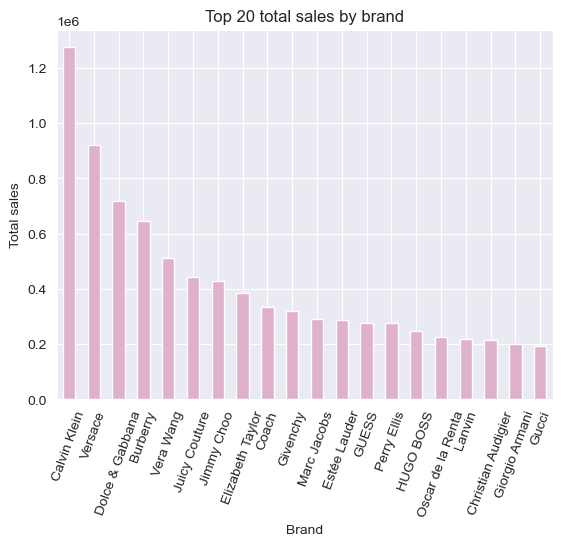

In [72]:
top_10 = sales_by_brand[:20]
top_10.plot(kind='bar', color='#e0b1cb')
plt.title('Top 20 total sales by brand')
plt.xlabel('Brand')
plt.ylabel('Total sales')
plt.xticks(rotation=70)
plt.show()

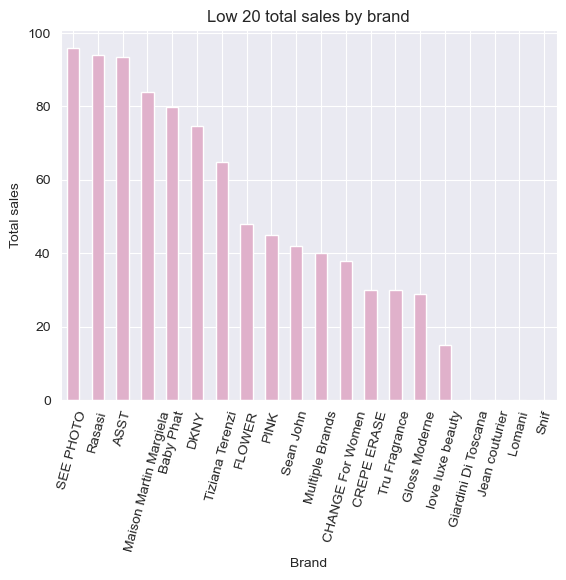

In [73]:
low_10 = sales_by_brand.tail(20)
low_10.plot(kind='bar', color='#e0b1cb')
plt.title('Low 20 total sales by brand')
plt.xlabel('Brand')
plt.ylabel('Total sales')
plt.xticks(rotation=75)
plt.show()

In [74]:
# analyze performance of different product types
sales_by_type = women_df.groupby('type')['total'].sum().sort_values(ascending=False)
sales_by_type

type
Eau de Parfum                               8561653.04
Eau de toilette                             4817722.67
Eau de cologne                               316337.81
Body Lotion                                   37797.76
Gift Sets                                     32541.41
body mist                                     26102.91
Body Powder                                   21722.76
Hair Perfume                                  13966.80
Lotion                                        10188.97
Deodorant Stick                                8815.59
EDT                                            8698.26
Perfume Oil                                    6360.19
Fragrances                                     5585.99
cologne                                        3470.01
SKIN_MOISTURIZER                               3032.07
Shimmer                                        1975.00
Cream                                          1862.31
Sensuous Body Moisturizer                      1846.00
Oil P

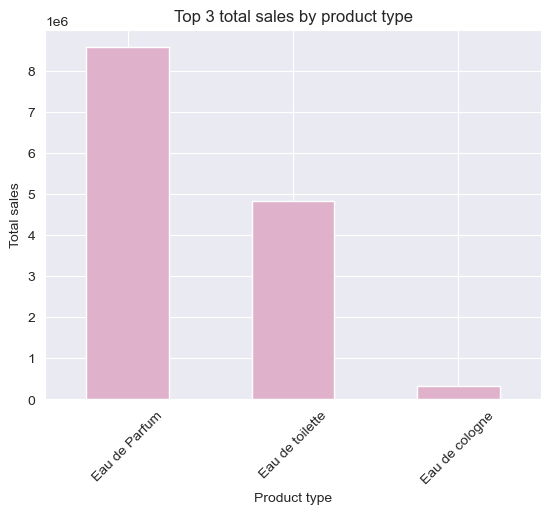

In [125]:
top_3_products = sales_by_type[:3]
top_3_products.plot(kind='bar', color='#e0b1cb')
plt.title('Top 3 total sales by product type')
plt.xlabel('Product type')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.show()

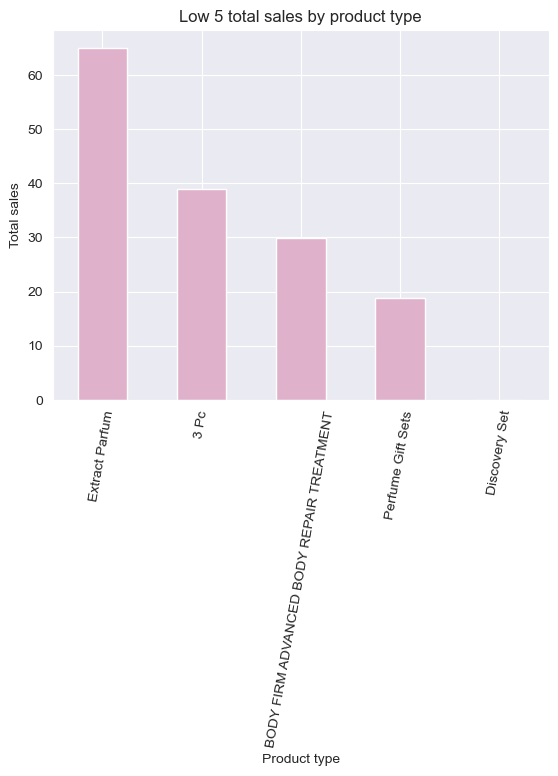

In [76]:
low_5 = sales_by_type.tail(5)
low_5.plot(kind='bar', color='#e0b1cb')
plt.title('Low 5 total sales by product type')
plt.xlabel('Product type')
plt.ylabel('Total sales')
plt.xticks(rotation=80)
plt.show()

In [77]:
# total sales by location
sales_by_loc = women_df.groupby('itemLocation')['total'].sum().sort_values(ascending=False)
sales_by_loc

itemLocation
Hackensack, New Jersey, United States        6011697.83
Dallas, Texas, United States                 5349550.01
Edison, New Jersey, United States             292587.65
Katy, Texas, United States                    263493.60
Miami, Florida, United States                 128623.86
                                                ...    
Colorado Springs, Colorado, United States          0.00
Bowling Green, Kentucky, United States             0.00
Cranford, New Jersey, United States                0.00
West Hollywood, California, United States          0.00
Little Ferry, New Jersey, United States            0.00
Name: total, Length: 299, dtype: float64

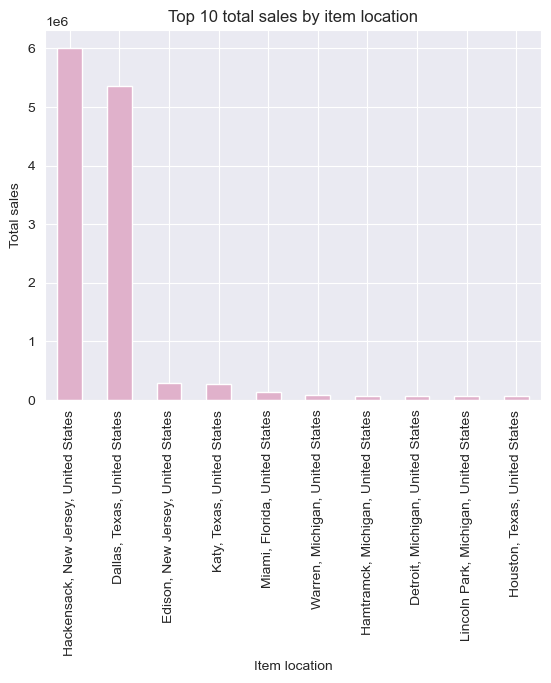

In [78]:
top_10sales_by_location = sales_by_loc[:10]
top_10sales_by_location.plot(kind='bar', color='#e0b1cb')
plt.title('Top 10 total sales by item location')
plt.xlabel('Item location')
plt.ylabel('Total sales')
plt.show()

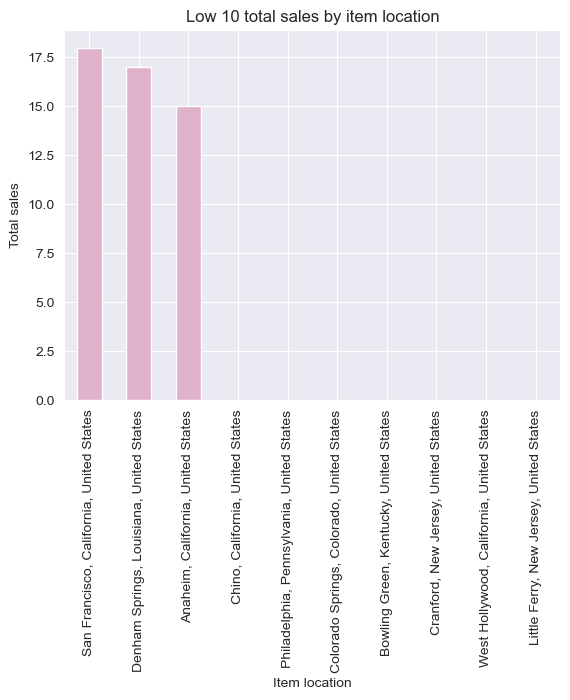

In [79]:
low_10sales_by_location = sales_by_loc.tail(10)
low_10sales_by_location.plot(kind='bar', color='#e0b1cb')
plt.title('Low 10 total sales by item location')
plt.xlabel('Item location')
plt.ylabel('Total sales')
plt.show()

#### The plot clearly shows an increase in perfume sales during May,indicating a seasonal trend where sales rise as temperatures increase.

In [115]:
corr_price_sold = women_df['correct_sold'].corr(women_df['price_in_$'])
corr_price_sold

-0.14225161193585528

#### as the the price of perfume increases, the number of items sold tends to decrease.

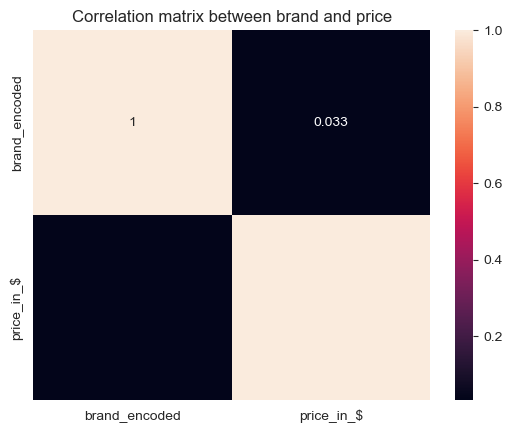

In [116]:
# correlation
df = women_df[['brand', 'price_in_$']].copy()
df.loc[:, 'brand_encoded'] = df['brand'].astype('category').cat.codes
encoded_df = df[['brand_encoded', 'price_in_$']]
correlation_matrix = encoded_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix between brand and price')
plt.show()

#### a correlation value of 0.033 indicates that changes in the brand are not strongly associated with changes in price

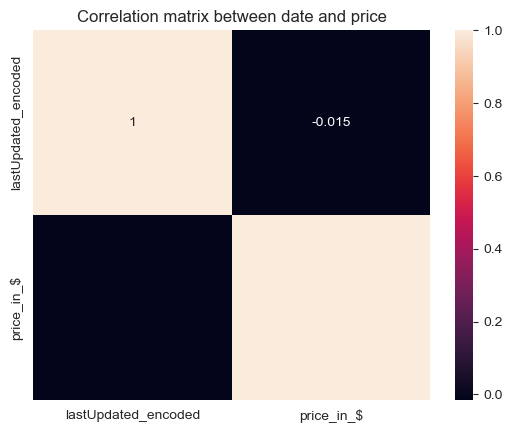

In [117]:
df = women_df[['lastUpdated', 'price_in_$']].copy()
df.loc[:, 'lastUpdated_encoded'] = df['lastUpdated'].astype('category').cat.codes
encoded_df = df[['lastUpdated_encoded', 'price_in_$']]
correlation_matrix = encoded_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix between date and price')
plt.show()

#### correlation value of -0.015 indicates that date does not significantly impact the pricing of products.

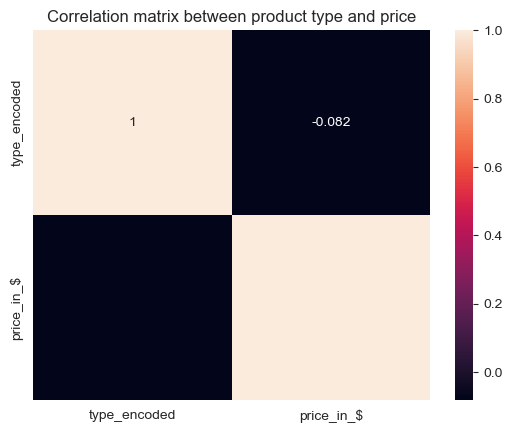

In [118]:
df = women_df[['type', 'price_in_$']].copy()
df.loc[:, 'type_encoded'] = df['type'].astype('category').cat.codes
encoded_df = df[['type_encoded', 'price_in_$']]
correlation_matrix = encoded_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix between product type and price')
plt.show()

#### correlation value of -0.082 indicates that the product type has a limited impact on pricing decisions.

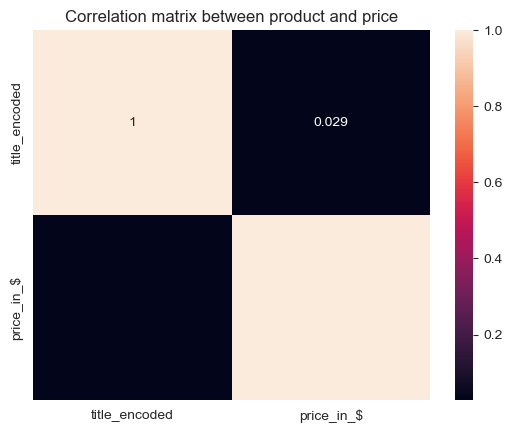

In [119]:
df = women_df[['title', 'price_in_$']].copy()
df.loc[:, 'title_encoded'] = df['title'].astype('category').cat.codes
encoded_df = df[['title_encoded', 'price_in_$']]
correlation_matrix = encoded_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix between product and price')
plt.show()

#### correlation value of 0.029 indicates that titles of products do not seem to influence their prices.

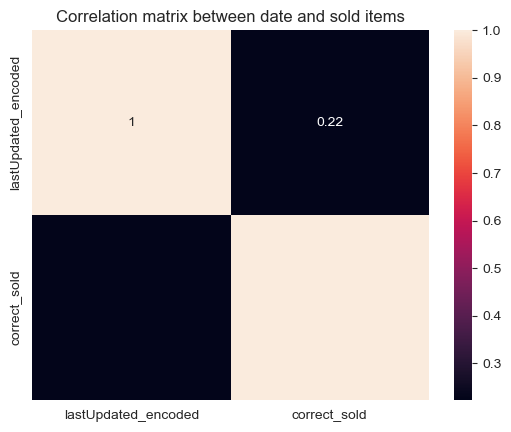

In [123]:
df = women_df[['correct_sold', 'lastUpdated']].copy()
df.loc[:, 'lastUpdated_encoded'] = df['lastUpdated'].astype('category').cat.codes
encoded_df = df[['lastUpdated_encoded', 'correct_sold']]
correlation_matrix = encoded_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix between date and sold items')
plt.show()

#### correlation value of 0.22 indicates that recent updates are linked with increased sales activity.

#### The slight increase in sales over time could indicate improving market conditions, effective promotions, or growing consumer interest.

### Summary
The analysis reveals that while there are some correlations between variables such as price,
availability, brand, and product type, these relationships are generally weak to moderate.
Lower-priced fragrances tend to show a slight increase in sales, availability positively
influences sales volume, and there are minor differences in pricing based on product type.
The brand alone does not significantly impact pricing decisions in this dataset.
Additionally, sales of women's fragrances on eBay showed a positive trend over the analyzed period.